# Árboles de decisión

## Clasificador subsetForest

El clasificador *subsetForest* es un modelo de aprendizaje conjunto en el que se considera un conjunto de árboles de decisión construidos considerando distintos subconjuntos del conjunto de características de los datos de entrenamiento.

Por ejemplo, el conjunto de datos de entrenamiento *Iris* tiene cuatro características, *longitud de sépalo*, *anchura de sépalo*, *longitud de pétalo* y *anchura de pétalo*. Se podrían construir árboles de decisión para este conjunto de datos considerando solamente algunas de las características (un subconjunto); por ejemplo {*longitud de sépalo*, *anchura de sépalo*} podría ser uno de esos subconjuntos de características. Al eliminar algunas características se pierde información del conjunto de datos original, por lo que puede ser conveniente considerar distintos subconjuntos de características, de forma que no se pierda información del conjunto de datos original, y construir un modelo de aprendizaje conjunto con modelos obtenidos para cada uno de estos subconjuntos. Esta es la idea que se plantea en este ejercicio.

Consideremos un conjunto de datos $X$ para los que $A$ es el conjunto de características:
* Para cada $a \in A$, consideramos las características $A_a = A-\{a\}$(todas las características excepto la $a$) y construimos un árbol de decisión $T_a$ para $X$ con las características de $A_a$. Es decir, construimos un árbol de decisión para $X$ después de eliminar la información correspondiente a la característica $a$.
* Se utilizan los árboles de decisión construidos anteriormente para realizar un modelo de aprendizaje conjunto en el que el valor de clasificación para una nueva instancia $x$ es el mayoritario entre los valores de clasificación de los árboles de decisión $T_a$, para todas las características $a$.

En el caso del conjunto de datos *Iris*, se estarían construyendo cuatro árboles de decisión para los conjuntos de datos {*anchura de sépalo*, *longitud de pétalo*, *anchura de pétalo*} ($T_1$), {*longitud de sépalo*, *longitud de pétalo*, *anchura de pétalo*} ($T_2$), {*longitud de sépalo*, *anchura de sépalo*, *anchura de pétalo*} ($T_3$) y {*longitud de sépalo*, *anchura de sépalo*, *longitud de pétalo*} ($T_4$). En este caso, el clasificador *subsetForest* sería un modelo de aprendizaje conjunto por votación mayoritaria para los modelos $\{T_1, T_2, T_3, T_4\}$.

## Contenido del ejercicio

El ejercicio consiste en
* Definir la función `subsetDecisionTreeClassifier(X_train,y_train,cs)` que, dado un conjunto de entrenamiento y su clasificación, `X_train` e `y_train`, y una lista de índices de características en dicho conjunto de datos, `cs`, devuelve un árbol de clasificación entrenado para el conjunto de datos `X_train` en el que se consideran únicamente las características cuyos índices aparecen en `cs`.
* Definir la función `subsetForestClassifierPredict(X_train,y_train,X)` que, dado un conjunto de entrenamiento y su clasificación, `X_train` e `y_train`, y un array de valores nuevos, `X`, devuelve el array de clasificaciones asignadas a los valores del array `X` por el clasificador *subsetForest* descrito en el primer apartado de este enunciado.
* Definir la función `subsetForestClassifierScore(X_train,y_train,X_test,y_test)` que, dado un conjunto de entrenamiento y su clasificación, `X_train` e `y_train`, y un conjunto de prueba y su clasificación, `X_test` e `y_test`, devuelve el rendimiento en el conjunto de prueba `X_test` del clasificador *subsetForest* construido con el conjunto de entrenamiento `X_train`.
* Evaluar la función `subsetForestClassifierScore` sobre los conjuntos de datos *Iris*, *Wine* y *Breast Cancer* de *Scikit-Learn* y compararlo con el rendimiento del modelo *randomForest* en dichos conjuntos de datos.

El **desarrollo tiene que estar razonado**, indicando en cada apartado qué se está haciendo, **demostrando así el conocimiento adquirido en este módulo**. ¿Qué conclusiones puedes sacar sobre el clasificador *subsetForest* comparado con el *randomForest*?

## Librerias

In [1]:
from sklearn.datasets import load_iris,load_wine,load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
import numpy as np

iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

In [2]:
X_data, y_data, X_names, y_names = \
    iris.data, iris.target, iris.feature_names, iris.target_names

In [3]:
X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.25,
                   random_state=462)

In [4]:
# export_graphviz(
#    tree1_clf,
#    out_file="iris_tree1.dot",
#    feature_names=iris.feature_names,
#    rounded=True,
#    filled=True)

In [5]:
def show_tree(tree_clf,features):
    export_graphviz(
        tree_clf,
        out_file="tree_clf.dot",
        feature_names=features,
        rounded=True,
        filled=True)
    !dot -Tpng tree_clf.dot -o tree_clf.png
    plt.clf()
    dpi = 70
    image = plt.imread("tree_clf.png")
    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(image)
    plt.show()

## Apartado 1

Definir la función `subsetDecisionTreeClassifier(X_train,y_train,cs)` que, dado un conjunto de entrenamiento y su clasificación, `X_train` e `y_train`, y una lista de índices de características en dicho conjunto de datos, `cs`, devuelve un árbol de clasificación entrenado para el conjunto de datos `X_train` en el que se consideran únicamente las características cuyos índices aparecen en `cs`.

En este apartado lo que voy a hacer es:

* primero, como dice el enunciado, del conjunto de entrenamiento voy a eliminar las caracteristicas cuyos indices no aparezcan en el array cs y acto seguido entrenaré el árbol con ese conjunto además del y_train

* después voy a  llamar al método definiendo una variable externa de cs(características) previamente ya que estos índices también los usaré para quedarme con los nombres de las caracteristicas que concuerden con estos los cuales guardo en una variable nueva.

* Por último simplemente dibujo el arbol

In [6]:
def subsetDecisionTreeClassifier(X_train,y_train,cs):
    
    # Elimino del conjunto de entrenamiento las caracteristicas que no esten en el array de indices (cs)
    X_train_cs = X_train[:, cs]
    
    # Construimos el arbol y lo guardamos en una variable
    tree1_clf = DecisionTreeClassifier()

    # Entrenamos el modelo con el conjunto  X_train_cs y y_train
    tree1_clf.fit(X_train_cs,y_train)
    return tree1_clf

In [7]:
# Aqui defino el array de indices para las caracteristicas , ya que tambien las elimino en los nombres(features names)
cs = [2,3]
tree1_clf = subsetDecisionTreeClassifier(X_train, y_train, cs)

In [8]:
# elimino los nombres de las caracteristicas no usadas
feature_names_cs = [iris.feature_names[i] for i in cs]

<Figure size 640x480 with 0 Axes>

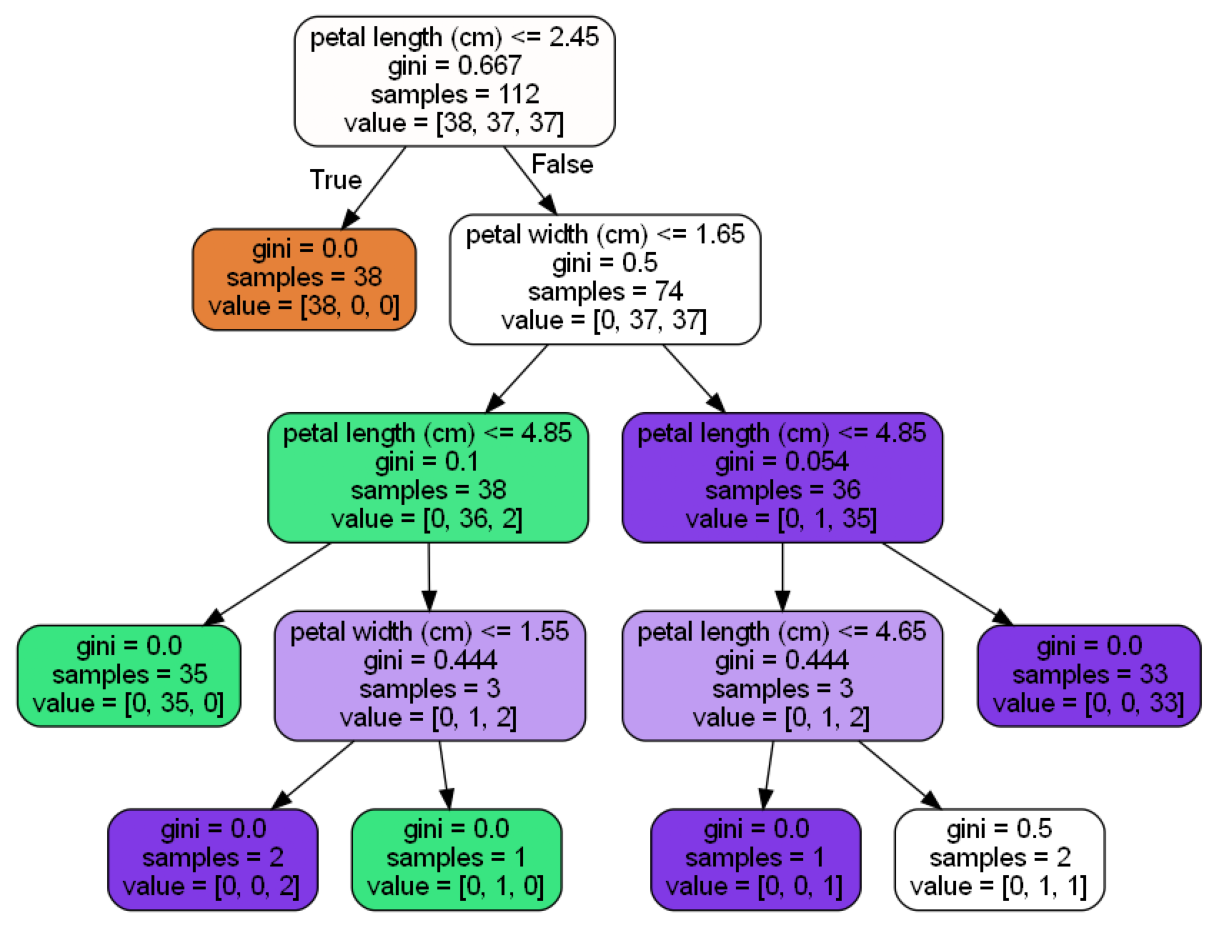

In [9]:
show_tree(tree1_clf, feature_names_cs)

## Apartado 2

Definir la función `subsetForestClassifierPredict(X_train,y_train,X)` que, dado un conjunto de entrenamiento y su clasificación, `X_train` e `y_train`, y un array de valores nuevos, `X`, devuelve el array de clasificaciones asignadas a los valores del array `X` por el clasificador *subsetForest* descrito en el primer apartado de este enunciado.


* Primero defino en unas variables el número de características  y de muestras del conjunto, tambien me definiré el número de arboles que voy a generar ya que como dice el enunciado se generaran un árbol por cada conjunto de características eliminando una cada vez.

* Inicializo una matriz para guardar las predicciones  y entreno un arbol por cada conjunto sin la caracteristica "i", después guardo las predicciones en la fila iseasima de la matriz de predicciones
 
* Ahora me creo una matriz para las predicciones finales y calculamos el valor mas comun en cada predicción para el subconjunto de árboles, con el atributo return_counts=True le digo al método que me devuelva también un recuento de cada elemento único

* Referencias
https://stackoverflow.com/questions/41679377/regarding-the-output-of-counting-the-unique-numbers-of-multi-dimension-array

In [10]:
def subsetForestClassifierPredict(X_train,y_train,X):
    
    # 4 en el caso del conjunto iris
    num_features = X_train.shape[1]
    # numero de elementos 
    num_samples = X.shape[0]
    #  Tendremos un arbol por cada caracteristica que genere un subconjunto
    num_trees = num_features  

    # Inicializa una matriz para almacenar las predicciones
    predictions = np.zeros((num_trees, num_samples), dtype=int)
    
    # Ahora vamos a entrenar los distintos arboles para los distintos subconjuntos y vamos a ir almacenando los resultados
    for i in range(num_features):
        # Creamos un subconjunto sin la caracteristica i con pop
        selected_features = list(range(num_features))
        selected_features.pop(i)
        
        X_train_sub = X_train[:, selected_features]
        tree_clf = DecisionTreeClassifier()
        #Entrenamos
        tree_clf.fit(X_train_sub, y_train)
        
        # Realizamos predicciones con el árbol y almacénalas en la matriz de predicciones en la iesima fila
        predictions[i, :] = tree_clf.predict(X[:, selected_features])

    # buscamos ahora la  mayoritaria para obtener la predicción
    final_predictions = np.zeros(num_samples, dtype=int)
    
    #calculamos el valor mas común en las prediciones de los subconjuntos de árboles
    for n in range(num_samples):
        # con return_counts en true le digo al metodo que me devuelva un recuento de cada elemento único
        unique, counts = np.unique(predictions[:, n], return_counts=True)
        final_predictions[n] = unique[np.argmax(counts)]

    return final_predictions

In [11]:
predictions = subsetForestClassifierPredict(X_train, y_train, X_test)

In [12]:
predictions

array([0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2])

## Apartado 3

Definir la función `subsetForestClassifierScore(X_train,y_train,X_test,y_test)` que, dado un conjunto de entrenamiento y su clasificación, `X_train` e `y_train`, y un conjunto de prueba y su clasificación, `X_test` e `y_test`, devuelve el rendimiento en el conjunto de prueba `X_test` del clasificador *subsetForest* construido con el conjunto de entrenamiento `X_train`

En este apartado simplemente evaluo el rendimiento de mi método subsetForestClassifierPredict , comparando el resultado obtenido de este con los del conjunto y_test

In [13]:
from sklearn.metrics import accuracy_score

def subsetForestClassifierScore(X_train, y_train, X_test, y_test):
    # Entrenar y guardo la prediccion en una variable 
    predictions = subsetForestClassifierPredict(X_train, y_train, X_test)
    # Calcular el score con la función accuracy_score
    score = accuracy_score(y_test, predictions)

    return score

In [14]:
score = subsetForestClassifierScore(X_train,y_train,X_test,y_test)
print("Precisión del clasificador subsetForest en el conjunto de prueba:", score)

Precisión del clasificador subsetForest en el conjunto de prueba: 0.8421052631578947


## Apartado 4

Evaluar la función `subsetForestClassifierScore` sobre los conjuntos de datos *Iris*, *Wine* y *Breast Cancer* de *Scikit-Learn* y compararlo con el rendimiento del modelo *randomForest* en dichos conjuntos de datos.

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=4)
forest.fit(X_train,y_train)

print("randomForest -Rendimiento en el conjunto de entrenamiento: ",forest.score(X_train,y_train))
print("randomForest- Rendimiento en el conjunto de prueba: ",forest.score(X_test,y_test))
print("randomForest -Rendimiento en el conjunto total: ",forest.score(X_data,y_data))
print("")

score = subsetForestClassifierScore(X_train,y_train,X_test,y_test)
print("subsetForestClassifierScore -Precisión del clasificador  en el conjunto de entrenamiento:", score)
score = subsetForestClassifierScore(X_test,y_test,X_train,y_train)
print("subsetForestClassifierScore - Precisión del clasificador  en el conjunto de prueba:", score)
score = subsetForestClassifierScore(X_data,y_data,X_test,y_test)
print("subsetForestClassifierScore -Precisión del clasificador  en el conjunto de total:", score)

randomForest -Rendimiento en el conjunto de entrenamiento:  0.9910714285714286
randomForest- Rendimiento en el conjunto de prueba:  0.9210526315789473
randomForest -Rendimiento en el conjunto total:  0.9733333333333334

subsetForestClassifierScore -Precisión del clasificador  en el conjunto de entrenamiento: 0.8947368421052632
subsetForestClassifierScore - Precisión del clasificador  en el conjunto de prueba: 0.9642857142857143
subsetForestClassifierScore -Precisión del clasificador  en el conjunto de total: 1.0


In [16]:
X_data, y_data, X_names, y_names = \
    wine.data, wine.target, wine.feature_names, wine.target_names



X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.25,
                   random_state=462)

In [17]:
forest = RandomForestClassifier(n_estimators=4)
forest.fit(X_train,y_train)


print("randomForest -Rendimiento en el conjunto de entrenamiento: ",forest.score(X_train,y_train))
print("randomForest -Rendimiento en el conjunto de prueba: ",forest.score(X_test,y_test))
print("randomForest -Rendimiento en el conjunto total: ",forest.score(X_data,y_data))
print("")
score = subsetForestClassifierScore(X_train,y_train,X_test,y_test)
print("subsetForestClassifierScore -Precisión en el conjunto de entrenamiento:", score)
score = subsetForestClassifierScore(X_test,y_test,X_train,y_train)
print("subsetForestClassifierScore -Precisión en el conjunto de prueba:", score)
score = subsetForestClassifierScore(X_data,y_data,X_test,y_test)
print("subsetForestClassifierScore -Precisión en el conjunto de total:", score)

randomForest -Rendimiento en el conjunto de entrenamiento:  0.9924812030075187
randomForest -Rendimiento en el conjunto de prueba:  0.9555555555555556
randomForest -Rendimiento en el conjunto total:  0.9831460674157303

subsetForestClassifierScore -Precisión en el conjunto de entrenamiento: 0.9555555555555556
subsetForestClassifierScore -Precisión en el conjunto de prueba: 0.8195488721804511
subsetForestClassifierScore -Precisión en el conjunto de total: 1.0


In [18]:
X_data, y_data, X_names, y_names = \
    cancer.data, cancer.target, cancer.feature_names, cancer.target_names



X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.25,
                   random_state=462)

In [19]:
forest = RandomForestClassifier(n_estimators=4)
forest.fit(X_train,y_train)


print("randomForest -Rendimiento en el conjunto de entrenamiento: ",forest.score(X_train,y_train))
print("randomForest -Rendimiento en el conjunto de prueba: ",forest.score(X_test,y_test))
print("randomForest -Rendimiento en el conjunto total: ",forest.score(X_data,y_data))
print()
score = subsetForestClassifierScore(X_train,y_train,X_test,y_test)
print("subsetForestClassifierScore -Precisión en el conjunto de entrenamiento:", score)
score = subsetForestClassifierScore(X_test,y_test,X_train,y_train)
print("subsetForestClassifierScore -Precisión en el conjunto de prueba:", score)
score = subsetForestClassifierScore(X_data,y_data,X_test,y_test)
print("subsetForestClassifierScore -Precisión en el conjunto de total:", score)

randomForest -Rendimiento en el conjunto de entrenamiento:  0.9835680751173709
randomForest -Rendimiento en el conjunto de prueba:  0.8881118881118881
randomForest -Rendimiento en el conjunto total:  0.9595782073813708

subsetForestClassifierScore -Precisión en el conjunto de entrenamiento: 0.9440559440559441
subsetForestClassifierScore -Precisión en el conjunto de prueba: 0.9389671361502347
subsetForestClassifierScore -Precisión en el conjunto de total: 1.0


## ¿Qué conclusiones puedes sacar sobre el clasificador *subsetForest* comparado con el *randomForest*?

* Parece que randomforest en estos conjuntos de datos tiende más al sobreajuste ya que en los conjuntos de entrenamiento tiene práticamente siempre un 100% de acierto

* Ambos métodos comparten simulitudes y diferencias ya que ambos se basan en la implementación de múltiples árboles pero se diferencian en que subsetforest crea los árboles eliminando una de las características en cada árbol que crea

* Subsetforest está limitado por el número de características a la hora de crear árboles mientras que randomforest crea subconjuntos de las caracteristicas
